In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model


from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

%matplotlib inline

In [2]:
main_directory = "/data0/jamesarnemann/cosmoNet/orig_paper/"
main_directory_2 = "/data1/jamesarnemann/cosmoNet/new_data_2/"
main_directory_3 = "/data0/jamesarnemann/cosmoNet/new_data_2_param_1/"
model_directories = {}

model_directories["original data"] = main_directory + "temp_results_0_vanilla_code/"
#model_directories["original data rerun"] = main_directory + "result/"

#model_directories["new data"] = main_directory_2 + "result/"
model_directories["new data fixed zshift"] = main_directory_3 + "results_2_12/"
#model_directories["new data fixed 16 channels"] = main_directory_3 + "results_16_32/"

model_directories["new new data"] = "/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/"



#model_directories["new model 1(run 1)"] = main_directory + "first_change_result"
#model_directories["new model 1(run 2)"] = main_directory + "first_change_result2"
#model_directories["new model 2"] = main_directory + "second_change_result"

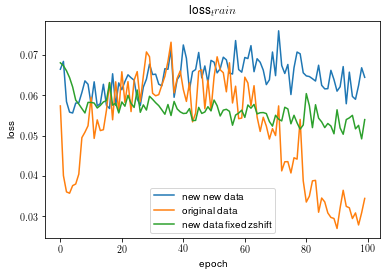

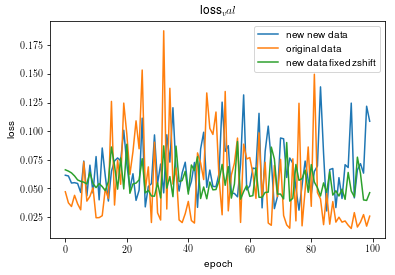

In [3]:
loss_types = ['loss_train','loss_val']
for loss_type in loss_types:
    file_type = '/' + loss_type + '.txt'
    plot ={}
    for model,model_dir in model_directories.iteritems():
        loss_file = open(model_dir + file_type, "r")

        loss = [float(val) for val in loss_file.read().splitlines()]

        plot[model], = plt.plot(loss, label=model)
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.title(loss_type)

#    plt.xlim((0,100))
    plt.ylim()
    plt.legend(handles=[plot[model] for model in model_directories])
    plt.show()

In [4]:
loss_type = 'loss_test'
file_type = '/' + loss_type + '.txt'
loss = {}
for model,model_dir in model_directories.iteritems():
    loss_file = open(model_dir + file_type, "r")

    loss[model] = np.array([float(val) for val in loss_file.read().splitlines()])

for model in model_directories:
    print model + " test-loss(mean,std):", loss[model].mean(),loss[model].std()

# print "paper test loss:", o_loss.mean(), o_loss.std()
# print "new test loss:", n_loss.mean(), n_loss.std()
# print "difference:", n_loss.mean()-o_loss.mean()
# print "difference std:", (n_loss-o_loss).std()

new new data test-loss(mean,std): 0.0359913266207 0.0133202862847
original data test-loss(mean,std): 0.0120155415878 0.00652328213969
new data fixed zshift test-loss(mean,std): 0.0419473428355 0.0138741758009


In [5]:
zscore_avg = [2.995679839999998983e-01,8.610806619999996636e-01]
zscore_std = [2.905168635566176411e-02,4.023372385668218254e-02]

In [6]:
test_results = {}
for model,model_dir in model_directories.iteritems():
    for i in range(49):
        file_name = 'test_batch_' + str(i) +'.txt'
        test_loss_file = open(model_dir + file_name, "r")
        print model
        print model_dir
        print file_name
        if not test_results.has_key(model):
            test_results[model] = []
        test_results[model].append(np.array([x.split() for x in test_loss_file.read().splitlines()],dtype=np.float32))
    test_results[model] = np.array(test_results[model])

new new data
/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/
test_batch_0.txt
new new data
/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/
test_batch_1.txt
new new data
/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/
test_batch_2.txt
new new data
/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/
test_batch_3.txt
new new data
/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/
test_batch_4.txt
new new data
/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/
test_batch_5.txt
new new data
/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/
test_batch_6.txt
new new data
/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/
test_batch_7.txt
new new data
/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/
test_batch_8.txt
new new data
/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/
test_batch_9.txt
new new data
/data1/jamesarnemann/cosmoNet/new_data_2_param_2/result/
test_batch_10.txt
new new data
/data1/jamesarnemann/cosmoNet

In [7]:
test_results[model].shape

(49, 64, 4)

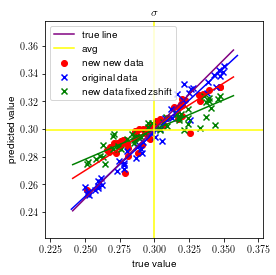

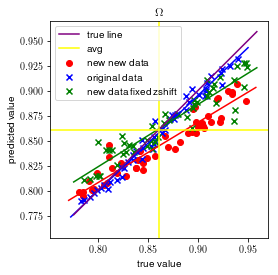

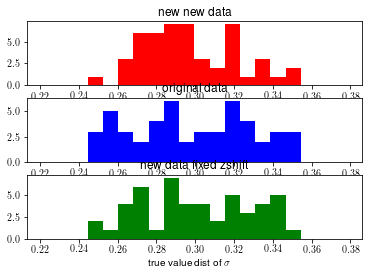

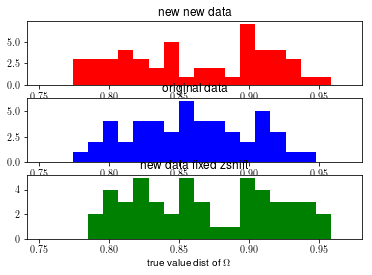

In [29]:
#np.mean(test_results['new data'],axis=1).shape
param = 0
labels = [r'\sigma',r'\Omega']
markers = ['o','x','x','o']
colors = ['red','blue','green','purple']

for param in range(0,2):
    for index , model in enumerate(model_directories):
        x = []
        y = []
        averages = np.mean(test_results[model],axis=1)
        for i in range(averages.shape[0]):
            x.append(averages[i][param])
            y.append(averages[i][param+2])
        plt.scatter(x,y,marker=markers[index],c = colors[index],label = model)
        #plt.plot([.2,.4],[.2,.4])
        extremes = [np.min(averages[:,[param,param+2]])-.02,np.max(averages[:,[param,param+2]])+.02]
        regr = linear_model.LinearRegression()
        regr.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))
        
        
        #plt.plot([.2,.4],[.2,.4])
        extremes = [np.min(averages[:,[param,param+2]])-.01,np.max(averages[:,[param,param+2]])+.01]
        
        plt.plot(np.array(extremes).reshape(-1,1),regr.predict(np.array(extremes).reshape(-1,1)),c=colors[index])

        
        
    plt.plot(extremes,extremes,c='purple',label='true line')
    plt.axhline(zscore_avg[param],c='yellow')
    plt.axvline(zscore_avg[param],c='yellow',label='avg')
    plt.legend()
    plt.title(labels[param])
    plt.axis('equal')
    plt.axis([zscore_avg[param]-2.7*zscore_std[param],zscore_avg[param]+2.7*zscore_std[param],zscore_avg[param]-2.7*zscore_std[param],zscore_avg[param]+2.7*zscore_std[param]])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("true value")
    plt.ylabel("predicted value")
    plt.show()

#fig, axs = plt.subplots(3, 2)


for param in range(0,2):
    fig = plt.figure()
    for index , model in enumerate(model_directories):
        ax = fig.add_subplot(int("31"+str(index+1)))
        ax.set_title(model)
        ax.hist(test_results[model][:,0,param],bins=20,color=colors[index],range=(zscore_avg[param]-2.7*zscore_std[param],zscore_avg[param]+2.7*zscore_std[param]))
        #axs[0,index]. xlabel("true value")
    
    fig.text(0.5, 0.04, str('true value dist of ' + labels[param]), ha='center', va='center')
    #fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')


    plt.show()
plt.hist?

In [51]:
for model in model_directories:

    if test_results.has_key(model):
        print "------------"
        print model
        print r'actual sigma Omega predicted sigma Omega average'
        for i in range(4):
            print np.mean(np.mean(test_results[model][:,:,i],axis=1)),
        print ""
        print "predicted sigma Omega difference from actual"
        for i in range(2):
            print np.std(np.mean(test_results[model][:,:,i+2],axis=1)-np.mean(test_results[model][:,:,i],axis=1)),
        print ""

------------
new new data
actual sigma Omega predicted sigma Omega average
0.297551 0.862775 0.300078 0.845801 
predicted sigma Omega difference from actual
0.0106582 0.0221563 
------------
original data
actual sigma Omega predicted sigma Omega average
0.298494 0.859538 0.296268 0.85641 
predicted sigma Omega difference from actual
0.00572131 0.00597275 
------------
new data fixed
actual sigma Omega predicted sigma Omega average
0.300163 0.869429 0.299691 0.867074 
predicted sigma Omega difference from actual
0.0167423 0.0219329 


new new data
(3136,)


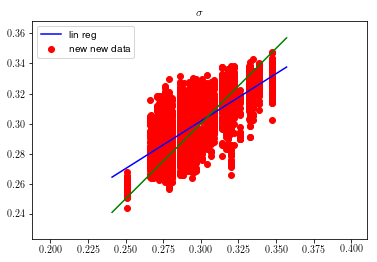

original data
(3136,)


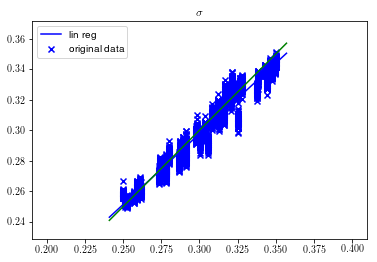

new data fixed
(3136,)


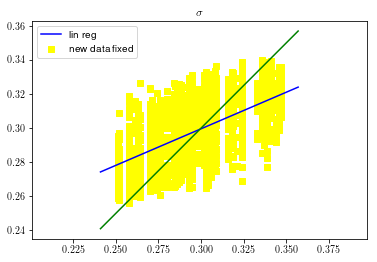

new new data
(3136,)


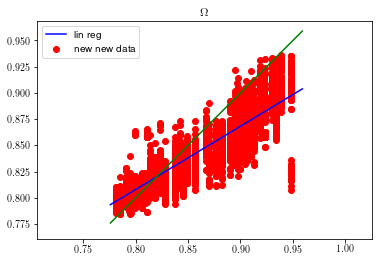

original data
(3136,)


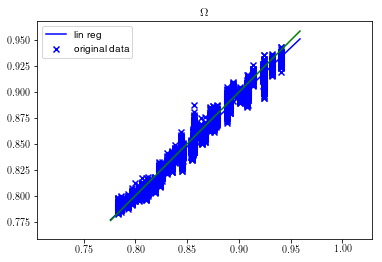

new data fixed
(3136,)


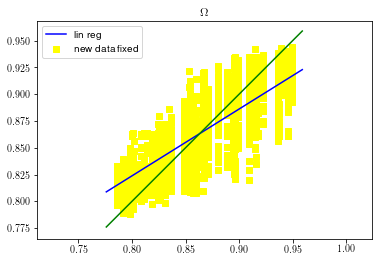

In [52]:
param = 0
labels = [r'\sigma',r'\Omega']
markers = ['o','x','s','o']
colors = ['red','blue','yellow','purple']


for param in range(0,2):
    for index , model in enumerate(model_directories):
        x = []
        y = []
        for n in range(test_results[model].shape[1]):
            for i in range(test_results[model].shape[0]):
                x.append(test_results[model][i,n,param])
                y.append(test_results[model][i,n,param+2])
        print model
        plt.scatter(x,y,marker=markers[index],c = colors[index],label = model)
        # Create linear regression object
        regr = linear_model.LinearRegression()
    
        # Train the model using the training sets
        print np.array(y).shape
        regr.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))
        
        
        #plt.plot([.2,.4],[.2,.4])
        extremes = [np.min(averages[:,[param,param+2]])-.01,np.max(averages[:,[param,param+2]])+.01]
        
        plt.plot(np.array(extremes).reshape(-1,1),regr.predict(np.array(extremes).reshape(-1,1)),c='blue',label='lin reg')
        
        plt.plot(extremes,extremes,c='green')
        plt.legend()
        plt.title(labels[param])
        plt.axis('equal')
        plt.show()